In [1]:
%pylab inline
plt.style.use("bmh")

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np
import geopandas as gpd

In [3]:
from shapely.geometry import box, Point

# AOI and "water" bodies

In [4]:
PATCH_S = 10
NUM_PATCHES = 1000

In [5]:
aoi = box(0, 0, 100, 100)
water = Point(40, 40).buffer(20)

In [6]:
aoi_df = gpd.GeoSeries([aoi])
water_df = gpd.GeoSeries([water])

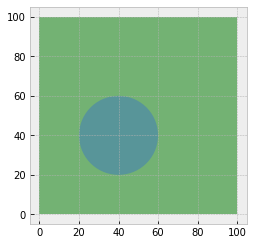

In [7]:
aoi_df.plot(ax=plt.gca(), facecolor="forestgreen", alpha=0.6)
water_df.plot(ax=plt.gca(), facecolor="steelblue", alpha=0.6)

# Random patches: bottom left corner

In [8]:
patches = gpd.GeoSeries.from_xy(*(np.random.rand(2, NUM_PATCHES) * (100 - PATCH_S)))  # note the buffer: we multiply by (100 - PATCH_S), not 100

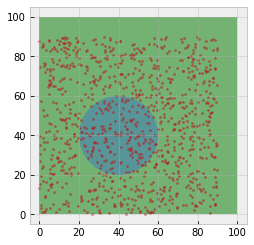

In [9]:
aoi_df.plot(ax=plt.gca(), facecolor="forestgreen", alpha=0.6)
water_df.plot(ax=plt.gca(), facecolor="steelblue", alpha=0.6)
patches.plot(ax=plt.gca(), facecolor="firebrick", alpha=0.6, markersize=4)

# Random patches: patches calculation

In [10]:
patches = patches.apply(lambda p: box(p.x, p.y, p.x + PATCH_S, p.y + PATCH_S))

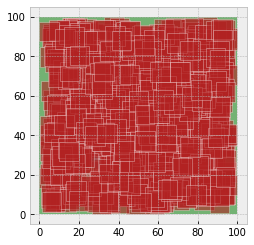

In [11]:
aoi_df.plot(ax=plt.gca(), facecolor="forestgreen", alpha=0.6)
water_df.plot(ax=plt.gca(), facecolor="steelblue", alpha=0.6)
patches.plot(ax=plt.gca(), facecolor="firebrick", alpha=0.6, edgecolor="w")

# Filtering based on "water" body intersection

In [12]:
patches = patches[~patches.intersects(water)]

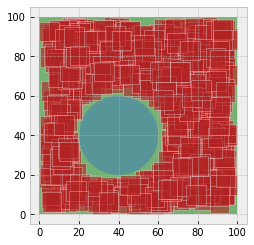

In [13]:
aoi_df.plot(ax=plt.gca(), facecolor="forestgreen", alpha=0.6)
water_df.plot(ax=plt.gca(), facecolor="steelblue", alpha=0.6)
patches.plot(ax=plt.gca(), facecolor="firebrick", alpha=0.6, markersize=4, edgecolor="w")

# Sampling patches

In [18]:
patches_sample = patches.sample(200)

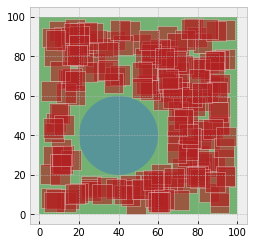

In [19]:
aoi_df.plot(ax=plt.gca(), facecolor="forestgreen", alpha=0.6)
water_df.plot(ax=plt.gca(), facecolor="steelblue", alpha=0.6)
patches_sample.plot(ax=plt.gca(), facecolor="firebrick", alpha=0.6, markersize=4, edgecolor="w")

In [25]:
patches_sample_weighted = patches.sample(200, weights=(1 / patches.distance(water)).clip(0.1, 5))

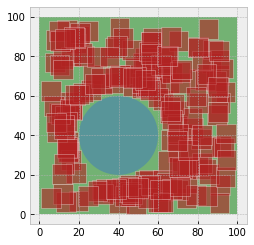

In [26]:
aoi_df.plot(ax=plt.gca(), facecolor="forestgreen", alpha=0.6)
water_df.plot(ax=plt.gca(), facecolor="steelblue", alpha=0.6)
patches_sample_weighted.plot(ax=plt.gca(), facecolor="firebrick", alpha=0.6, markersize=4, edgecolor="w")